In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

In [2]:
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing['income_cat'] = pd.cut(housing["median_income"],bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],labels=[1, 2, 3, 4, 5])

In [4]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index].drop("income_cat", axis=1)
    strat_test_set = housing.loc[test_index].drop("income_cat", axis=1)

housing_train = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

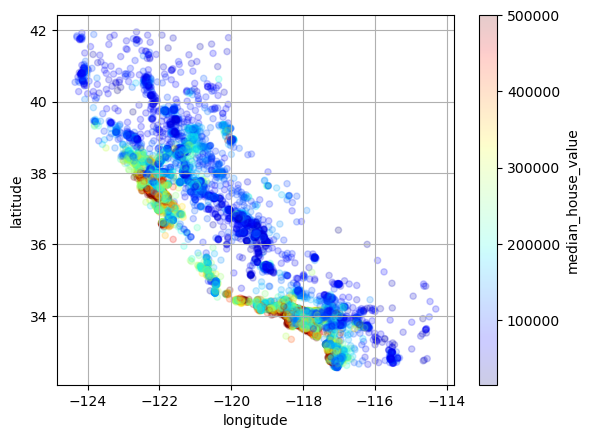

In [5]:
housing_train.plot(kind="scatter", 
                   x="longitude", y="latitude", 
                   grid=True, alpha=0.2,
                   cmap="jet",c="median_house_value")

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

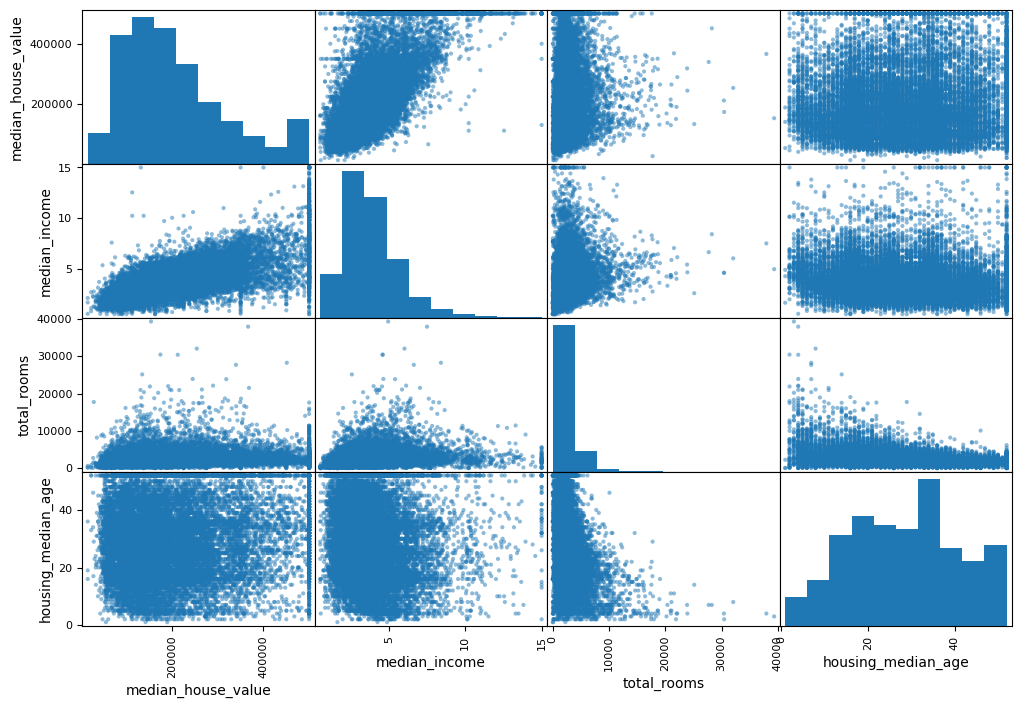

In [6]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

In [7]:
train_labels = housing_train["median_house_value"].copy()
train_features = housing_train.drop("median_house_value", axis=1)

In [8]:
cat_attribs = ["ocean_proximity"]
num_attribs = train_features.drop(columns=cat_attribs).columns.tolist()

In [9]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [10]:
housing_prepared = full_pipeline.fit_transform(train_features)
df=pd.DataFrame(housing_prepared)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, train_labels)
lin_cv_rmses = -cross_val_score(
    lin_reg, housing_prepared, train_labels,
    scoring="neg_root_mean_squared_error", cv=10
)

# Decision Tree
dec_reg = DecisionTreeRegressor(random_state=42)
dec_reg.fit(housing_prepared, train_labels)
dec_cv_rmses = -cross_val_score(
    dec_reg, housing_prepared, train_labels,
    scoring="neg_root_mean_squared_error", cv=10
)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(housing_prepared, train_labels)
rf_cv_rmses = -cross_val_score(
    rf_reg, housing_prepared, train_labels,
    scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1
)

In [12]:
test_features = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()

test_prepared = full_pipeline.transform(test_features)

In [13]:
lin_test_pred = lin_reg.predict(test_prepared)
dec_test_pred = dec_reg.predict(test_prepared)
rf_test_pred  = rf_reg.predict(test_prepared)

In [14]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

lin_test_rmse = rmse(test_labels, lin_test_pred)
dec_test_rmse = rmse(test_labels, dec_test_pred)
rf_test_rmse  = rmse(test_labels, rf_test_pred)

print("\nTEST SET RMSEs")
print(f"Linear Regression RMSE: {lin_test_rmse:.2f}")
print(f"Decision Tree RMSE:     {dec_test_rmse:.2f}")
print(f"Random Forest RMSE:     {rf_test_rmse:.2f}")


TEST SET RMSEs
Linear Regression RMSE: 67346.88
Decision Tree RMSE:     69203.53
Random Forest RMSE:     47197.67


In [15]:
comparison_df = test_features.reset_index(drop=True).copy()
comparison_df["Actual"] = test_labels.reset_index(drop=True)
comparison_df["LinearRegression"] = lin_test_pred
comparison_df["DecisionTree"] = dec_test_pred
comparison_df["RandomForest"] = rf_test_pred

print("\n==== FIRST 10 TEST ROWS: Actual vs Predictions ====")
print(comparison_df[["Actual", "LinearRegression", "DecisionTree", "RandomForest"]].head(10).round(2).to_string(index=True))


==== FIRST 10 TEST ROWS: Actual vs Predictions ====
     Actual  LinearRegression  DecisionTree  RandomForest
0  500001.0         419992.00      500001.0     483020.60
1  162500.0         291826.87      158200.0     221708.09
2  204600.0         245738.10      216000.0     205706.00
3  159700.0         195557.30      196200.0     170623.00
4  184000.0         264439.45      141400.0     212497.00
5  151900.0         219939.26      164100.0     164798.00
6  104900.0         162387.60      104500.0     114046.00
7  500001.0         366109.13      500001.0     434144.28
8  367400.0         289174.89      313100.0     280961.03
9  346500.0         231143.75      240600.0     258439.07


In [16]:
ninput = {
    "longitude": -122.23,
    "latitude": 37.88,
    "housing_median_age": 41,
    "total_rooms": 880,
    "total_bedrooms": 129,
    "population": 322,
    "households": 126,
    "median_income": 8.3252,
    "ocean_proximity": "NEAR BAY"   
}

input_df = pd.DataFrame([ninput])

input_prepared = full_pipeline.transform(input_df)

prediction = rf_reg.predict(input_prepared)[0]

print("\nPrediction for given input:")
print(f"Estimated House Value: ${prediction:,.2f}")



Prediction for given input:
Estimated House Value: $446,573.16
